In [15]:
import ode
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

# Kinetics Exploration

Enzymes are biological entities (usually proteins) that speed up almost all chemical processes. They are necessary for life and perform various critical functions in the body, including digestion and metabolism. Without enzymes, many chemical reactions in the body would not occur rapidly enough to sustain life. Enzymes are organic molecules that speed up reactions. Enzymes work by lowering the activation energy of a specific reaction without being consumed in the reaction. They do so by binding to the substrate, and catalysis of the biological system begins. The reaction starts after the substrate is bonded and the newly produced product is released. A simplified version of the substrate to product is displayed below: 

 ${E}+{S}\leftrightarrows{ES}\leftrightarrows{E}+{P}$

The forward reaction of $E+S$ is converted into $ES$ complex based off of the rate $k_1$ while the reverse reaction of $ES$ to $E+S$ is bassed on $k_2$. The forward reaction of $ES$ to $E+P$ is based on $k_3$ While the reverse reaction $E+P$ to $ES$ is based on $k_4$. 

#### The deferential equations for each reaction is written below:

<font size="5">$\frac{d[S]}{dt}$</font><font size="4">$=-K_{1}[E][S]+{k_2}[ES]$</font>


<font size="5">$\frac{d[E]}{dt}$</font><font size="4">$=-K_{1}[E][S]+{k_2}[ES]+{k_3}[ES]-{k_4}[E][P]$</font>



<font size="5">$\frac{d[ES]}{dt}$</font><font size="4">$=K_{1}[E][S]-{k_2}[ES]-{k_3}[ES]+{k_4}[E][P]$</font>


<font size="5">$\frac{d[P]}{dt}$</font><font size="4">$={k_3}[ES]-{k_4}[E][P]$</font>




- $k_{1}$ is the rate of the change of substrate S in the presence of enzyme E to intermediate ES
- $k_{2}$ is the reverse rate of change of intermediate ES back to Substrate
- $k_{3}$ is the rate of change of ES to Product and Enzyme
- $k_{4}$ is the reverse rate of change of Product and Enzyme back to ES

#### Assumptions:
* the reverse reaction of $E+P$ to $[ES] is negligible
* start off with no ES or P 

**Initial Conditions:**
* $k_1$ = 0.05 $\frac{1}{s}$
* $k_2$ = 0.1 $\frac{1}{s}$
* $k_3$ = 0.02 $\frac{1}{s}$
* $k_4$ = 0 $\frac{1}{s}$
* $E=3e-3\frac{M}{s}$
* $S=1e-3\frac{M}{s}$
* $ES=0\frac{M}{s}$
* $P=0\frac{M}{s}$

***

The function below integrates the differential equations shown above. The independent and dependent variables are listed below. Finally, arrays are created for the differential equations to be stored to plot them. 

In [16]:
def enzyme_kinetics(dep,t):
    E = dep[0]
    S = dep[1]
    ES = dep[2]
    P = dep[3]
    
    deriv = np.zeros(4)
    deriv[0] = -k1*E*S + k2*ES + k3*ES - k4*E*P #dE/dt
    deriv[1] = -k1*E*S + k2*ES #dS/dt
    deriv[2] = k1*E*S - k2*ES - k3*ES + k4*E*P #dES/dt
    deriv[3] = k3*ES - k4*E*P #dP/dt

    return deriv 


In [17]:
#dependent
k1 = 0.05 #1/s
k2 = 0.1 #1/s
k3 = 0.02 #1/s
k4 = 0 #1/s

S0 = 1 #mM
P0 = 0 #mM
E0 = 10 #mM
ES0 = 0 #mM
data = np.array([E0,S0,ES0,P0]) #initialize array to store dependent variables

#independent variables
t = 0
h = 0.05
Nsteps = int(500/h) #N steps for T seconds of evolution

#create arrays
tarray = np.zeros(Nsteps)
Sarray = np.zeros(Nsteps)
Earray = np.zeros(Nsteps)
ESarray = np.zeros(Nsteps)
Parray = np.zeros(Nsteps)
dpdtarray = np.zeros(Nsteps)

tarray[0] = t
Sarray[0] = S0
Earray[0] = E0
ESarray[0] = ES0
Parray[0] = P0
dpdtarray[0] = k3*ES0 - k4*E0*P0

#create a time evolution loop
for n in range(1,Nsteps):

    data = ode.RK4(enzyme_kinetics, data, t, h) #update [substrate, product

    t = t + h #update time

    #store values in arrays
    E = data[0]
    S = data[1]
    ES = data[2]
    P = data[3]

    tarray[n] = t #storing time
    Earray[n] = E #store enzyme  
    Sarray[n] = S #store substrate
    ESarray[n] = ES #store complex
    Parray[n] = P #store product
    dpdtarray[n] = k3*ES - k4*E*P


## Product Vs. Time

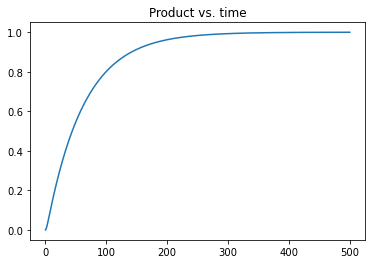

In [18]:
plt.title("Product vs. time")
plt.plot(tarray,Parray)

This graph represents product vs. time. The product increases when it reaches a constant value. If time continues, no more product is being produced (all the reactants have produced product). This is because the enzyme speeds up the reaction (produces product faster). The goal of the enzyme is to increase to rate of $\frac{dP}{dt}$. $\frac{dP}{dt}$ is the slope, so when $\frac{dP}{dt}$ is at a maximum, the reaction rate is at a max. The higher the intial concentration is the greater $\frac{dP}{dt}$ will be. 



* *The slope of this graph is $\frac{dP}{dt}$ and the goal of the enzyme is to increase the rate of $\frac{dP}{dt}$. Lets see how $\frac{dP}{dt}$ depends on substrate (SO).*


In [19]:
def go(S0):

#S0 = 1 #mM
    P0 = 0 #mM
    E0 = 10 #mM
    ES0 = 0 #mM
    data = np.array([E0,S0,ES0,P0]) #initialize array to store dependent variables

    #independent variables
    t = 0
    h = 0.05
    Nsteps = int(30/h) #N steps for T seconds of evolution

    #create arrays
    tarray = np.zeros(Nsteps)
    Sarray = np.zeros(Nsteps)
    Earray = np.zeros(Nsteps)
    ESarray = np.zeros(Nsteps)
    Parray = np.zeros(Nsteps)
    dpdtarray = np.zeros(Nsteps)

    tarray[0] = t
    Sarray[0] = S0
    Earray[0] = E0
    ESarray[0] = ES0
    Parray[0] = P0
    dpdtarray[0] = k3*ES0 - k4*E0*P0

    #create a time evolution loop
    for n in range(1,Nsteps):

        data = ode.RK4(enzyme_kinetics, data, t, h) #update [substrate, product

        t = t + h #update time

        #store values in arrays
        E = data[0]
        S = data[1]
        ES = data[2]
        P = data[3]

        tarray[n] = t #storing time
        Earray[n] = E #store enzyme  
        Sarray[n] = S #store substrate
        ESarray[n] = ES #store complex
        Parray[n] = P #store product
        dpdtarray[n] = k3*ES - k4*E*P

    return np.amax(dpdtarray)

## $\frac{dP}{dt}$ vs. S0

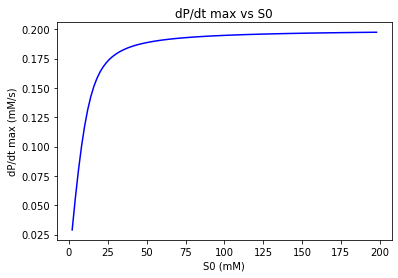

In [26]:
k1 = 0.05 #1/s
k2 = 0.1 #1/s
k3 = 0.02 #1/s
k4 = 0 #1/s

dpdtmaxdata = []
S0array = np.arange(2,200,2)

for S0 in S0array:
    dpdtmax = go(S0)
    dpdtmaxdata.append(dpdtmax)

fig = plt.figure()
plt.title("dP/dt max vs S0")
plt.plot(S0array, dpdtmaxdata, 'b-')
plt.xlabel('S0 (mM)')
plt.ylabel('dP/dt max (mM/s)')
plt.show()

When you graph $\frac{dP}{dt}$ vs. S0, and you look at when the substrate is 40, $\frac{dP}{dt}$ is not at its max, so the rate of product formation is low. However, when you go from 20 to 40, a larger slope indicates that the rate of product formation is quicker. By doubling the substrate from 20 to 40, you double $\frac{dP}{dt}$. Overall, we can conclude that increasing a substrate does not help beyond a specific value.

In [21]:
Vmax = np.amax(dpdtmaxdata)
Vmax

0.19468014683330118

This is when $\frac{dP}{dt}$ is a max, indicating that this is where the rate of product formation is at its highest. A larger S0 increases the maximum rate of product formation over time. A smaller S0 decreases the rate of product formation over time.

## Conclusion

Using ODEs, we examined the simple relationship between S and P. We found that when we decrease the amount of substrate, the amount of product increases. The rate of change of P over time is the slope ($\frac{dP}{dt}$). $\frac{dP}{dt}$ is the rate at which the product is formed. 